In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from matplotlib import rc

names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['duration']

In [57]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/90Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv(f'data/worst_case@STL@1M@90-10-LBA@90Util@run1@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
#sns.set_style("ticks") 
sns.set_palette("muted")
sns.set_palette("colorblind")


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6, 3), dpi=300)
#plt.figure(figsize=(5, 4))  # Adjust the figure size (width, height)
plt.rcParams['path.simplify'] = True
plt.rcParams['path.simplify_threshold'] = 0.1  # Adjust the threshold to balance quality and performance
# Step 4: Plot the CDF
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax1.set_xscale('log', base=2)
#ax1.plot(data_sorted, cdf, marker='.', linestyle='none', label="90% zone utilization") #, color='red')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="90% zone utilization", ax=ax1, legend=False)
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_xlabel('Latency (seconds in log_2)')
ax1.set_ylabel('CDF')
#plt.grid(True)

# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/75Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv(f'data/worst_case@STL@1M@90-10-LBA@75Util@run1@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Mark the 90th and 99th percentiles with vertical lines
# plt.plot(data_sorted, cdf, marker='.', markersize=2, linestyle='none', label="75% zone utilization", color='blue')
#ax1.plot(data_sorted, cdf, marker='.', linestyle='none', label="75% zone utilization") #, color='blue')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="75% zone utilization", ax=ax1, legend=False)

#plt.grid(True)

# # Step 1: Read the CSV file into a Pandas DataFrame
# # df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/50Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
# df = pd.read_csv(f'data/worst_case@STL@1M@90-10-LBA@50Util@run1@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
# df['duration'] = df['duration']/1e9
# # Step 1: Sort the data
# data_sorted = np.sort(df['duration'])
# # Step 2: Compute the Cumulative Distribution Function (CDF)
# cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
# plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="50% zone utilization")

# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/25Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv(f'data/worst_case@STL@1M@90-10-LBA@25Util@run1@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#ax1.plot(data_sorted, cdf, marker='.', linestyle='none', label="25% zone utilization") #, color='black')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="25% zone utilization", ax=ax1, legend=False)

df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/empty/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv(f'data/empty-lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#plt.plot(data_sorted, cdf, marker='.', markersize=2, linestyle='none', label="Empty Zones", color='gray')
#ax1.plot(data_sorted, cdf, marker='.', linestyle='none', label="Empty Zones") #, color='gray')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="Empty Zones", ax=ax1, legend=False)

plt.rcParams['path.simplify'] = True
plt.rcParams['path.simplify_threshold'] = 0.1  # Adjust the threshold to balance quality and performance


ax1.set_title('DMHybrid')
plt.grid(True)
plt.legend(fontsize=12)
#plt.savefig("/home/surbhi/Downloads/1M_DMHybrid_CDF_ZoneUtilization.png", bbox_inches='tight', dpi=300)
# Check the default font family
print(plt.rcParams['font.family'])

# Check the default font size
print(plt.rcParams['font.size'])

# Check the default font used for the text
print(plt.rcParams['font.sans-serif'])
#print the font used on the x-axis
print(plt.rcParams['xtick.labelsize'])
xlabel = plt.gca().xaxis.label
font_properties = xlabel.get_font_properties()
print("X-axis label font family:", font_properties.get_name())
print("X-axis label font size:", xlabel.get_size())

# Custom formatter to display ticks as powers of 10
def log2_format(x, pos):
    return f'$2^{{{int(np.log2(x))}}}$' if x > 0 else '0'

ax1.set_xscale('log', base=2)
common_ticks = [2**i for i in range(-6, 15, 3)]
ax1.set_xticks(common_ticks, labels=[f'$2^{{{i}}}$' for i in range(-6, 15, 3)])

# Get the font properties of the y-tick labels
yticks = plt.gca().get_yticklabels()
if yticks:
    font_properties = yticks[0].get_font_properties()
    print("Y-tick label font family:", font_properties.get_name())
    print("Y-tick label font size:", yticks[0].get_size())

ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv('data/worst_case@HM-Hybrid@1M@90-10-LBA@90Util@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#ax2.plot(data_sorted, cdf, marker='.', linestyle='none', label="90% zone utilization") #, color='red')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="90% zone utilization", ax=ax2, legend=False)


df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/75Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv('data/worst_case@HM-Hybrid@90-10-LBA@75Util@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
#ax2.plot(data_sorted, cdf, marker='.', linestyle='none', label="75% zone utilization") #, color='blue')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="75% zone utilization", ax=ax2, legend=False)


df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/25Util/147Zones.WakeOne/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv('data/worst_case@HM-Hybrid@90-10-LBA@25Util@147Zones.WakeOne@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
#ax2.plot(data_sorted, cdf, marker='.', linestyle='none', label="25% zone utilization") #, color='black')
sns.lineplot(x=data_sorted, y=cdf, linestyle='', label="25% zone utilization", ax=ax2, legend=False)


# Custom formatter to display ticks as powers of 10
def log2_format(x, pos):
    return f'$2^{{{int(np.log2(x))}}}$' if x > 0 else '0'

ax2.set_xscale('log', base=2)
common_ticks = [2**i for i in range(-6, 15, 3)]
ax2.set_xticks(common_ticks, labels=[f'$2^{{{i}}}$' for i in range(-6, 15, 3)])
ax2.yaxis.tick_left()
ax1.tick_params(direction='in')
ax2.tick_params(direction='in')

#plt.rcParams['path.simplify'] = True
#plt.rcParams['path.simplify_threshold'] = 0.1  # Adjust the threshold to balance quality and performance

ax2.set_xlabel('Latency (seconds in log_2)')
ax2.set_title('HM-Hybrid')
#plt.savefig("/home/surbhi/Downloads/1M_HMHybrid_CDF_ZoneUtilization.png", dpi=300, bbox_inches='tight')
plt.show()


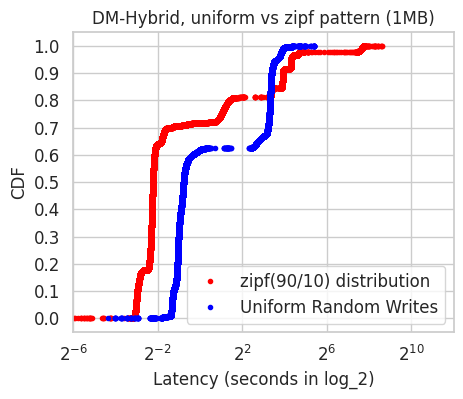

In [46]:
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/90Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv(f'data/worst_case@STL@1M@90-10-LBA@90Util@run1@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 4: Plot the CDF

cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)
# Mark the 90th and 99th percentiles with vertical lines
#plt.axvline(x=p50, color='r', linestyle=':', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
##plt.axvline(x=p90, color='black', linestyle=':', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
#plt.axvline(x=p99, color='g', linestyle=':', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
#plt.axvline(x=p999, color='y', linestyle=':', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")

plt.figure(figsize=(5, 4))  # Adjust the figure size (width, height)
plt.rcParams['path.simplify'] = True
plt.rcParams['path.simplify_threshold'] = 0.1  # Adjust the threshold to balance quality and performance

plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="zipf(90/10) distribution", color='red')
#plt.grid(True)


# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/uniform-random/25Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv(f'data/worst_case@STL@1M@uniform-random@25Util@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)
# Mark the 90th and 99th percentiles with vertical lines
#plt.axvline(x=p50, color='r', linestyle=':', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
#plt.axvline(x=p90, color='black', linestyle=':', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
#plt.axvline(x=p99, color='g', linestyle=':', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
#plt.axvline(x=p999, color='y', linestyle=':', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")


# Step 4: Plot the CDF
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log', base=2)
common_ticks = [2**i for i in range(-6, 12, 2)]
plt.xticks(common_ticks, labels=[f'$2^{{{i}}}$' for i in range(-6, 12, 2)])
# Mark the 90th and 99th percentiles with vertical lines
plt.xlim(2**-6, 2**12)
plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="Uniform Random Writes", color='blue')
plt.xscale('log', base=2)
#plt.grid(True)


plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Latency (seconds in log_2)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.tight_layout()  # Ensure everything fits nicely
#plt.title('Cumulative Distribution Function (CDF) of DM-Hybrid \n (uniform vs 90/10 zipf random writes pattern), 45GB burst, \n Different Effective Cache sizes', fontsize=14)
plt.title("DM-Hybrid, uniform vs zipf pattern (1MB)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
#plt.savefig("/home/surbhi/Downloads/1M_DMHybrid_pattern_CDF.pdf", bbox_inches='tight', format="pdf")
plt.savefig("/home/surbhi/Downloads/1M_DMHybrid_pattern_CDF.png", dpi=300, bbox_inches='tight')
plt.show()



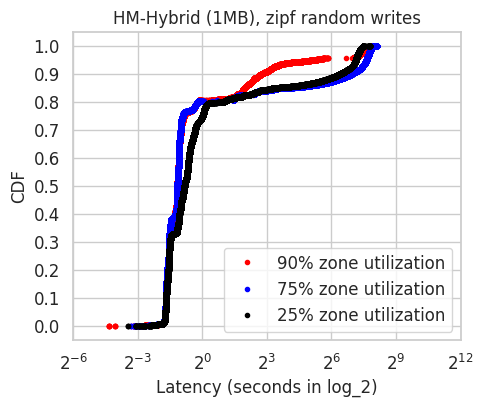

In [47]:
from matplotlib.ticker import LogLocator, LogFormatter
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv('data/worst_case@HM-Hybrid@1M@90-10-LBA@90Util@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
plt.figure(figsize=(5, 4))  # Adjust the figure size (width, height)

plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="90% zone utilization", color='red')


df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/75Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv('data/worst_case@HM-Hybrid@90-10-LBA@75Util@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="75% zone utilization", color='blue')


df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/25Util/147Zones.WakeOne/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
#df = pd.read_csv('data/worst_case@HM-Hybrid@90-10-LBA@25Util@147Zones.WakeOne@lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="25% zone utilization", color='black')


# Step 4: Plot the CDF
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# Mark the 90th and 99th percentiles with vertical lines

# Custom formatter to display ticks as powers of 10
def log2_format(x, pos):
    return f'$2^{{{int(np.log2(x))}}}$' if x > 0 else '0'

plt.xscale('log', base=2)
common_ticks = [2**i for i in range(-6, 15, 3)]
plt.xticks(common_ticks, labels=[f'$2^{{{i}}}$' for i in range(-6, 15, 3)])

plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(fontsize=12)

plt.rcParams['path.simplify'] = True
plt.rcParams['path.simplify_threshold'] = 0.1  # Adjust the threshold to balance quality and performance
plt.xlabel('Latency (seconds in log_2)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.title('HM-Hybrid (1MB), zipf random writes', fontsize=12)
plt.grid(True)
plt.savefig("/home/surbhi/Downloads/1M_HMHybrid_CDF_ZoneUtilization.png", dpi=300, bbox_inches='tight')
plt.show()

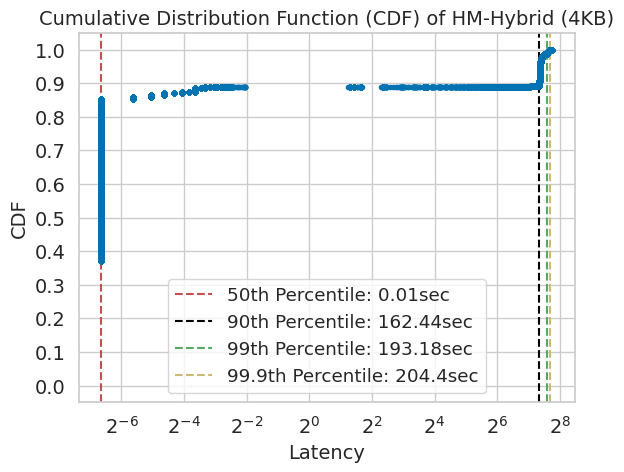

In [48]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/4KB/90-10-LBA/90Util/15Zones.WakeOne/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
threshold = 600
data = df['duration']
filtered_data = data[data <= threshold]

data_sorted = np.sort(filtered_data)

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data, 50)
p90 = np.percentile(data, 90)
p99 = np.percentile(data, 99)

# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale('log', base=2)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p50, color='r', linestyle='--', label='50th Percentile: ' + str(round(p50, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
p999 = np.percentile(data_sorted, 99.9)
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")


plt.legend()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HM-Hybrid (4KB)', fontsize=14)
plt.grid(True)
plt.show()

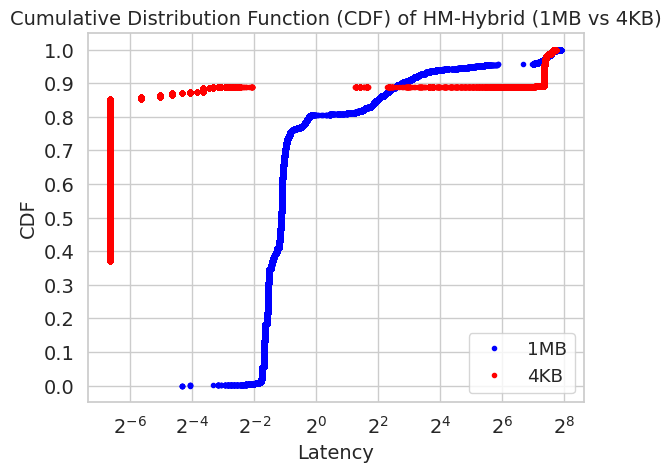

In [49]:
from matplotlib.ticker import LogLocator, LogFormatter
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="1MB", color='blue')


df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/4KB/90-10-LBA/90Util/15Zones.WakeOne/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
threshold = 600
data = df['duration']
filtered_data = data[data <= threshold]

data_sorted = np.sort(filtered_data)

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale('log', base=2)
plt.plot(data_sorted, cdf, marker='.', linestyle='none', color='red', label='4KB')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HM-Hybrid (1MB vs 4KB)', fontsize=14)
plt.grid(True)
plt.savefig("/home/surbhi/Downloads/1M_STL_CDF_ZoneUtilization.pdf", bbox_inches='tight', format="pdf")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/surbhi/measurements/worst_case/HM-Hybrid/uniform/1MB/90Util/lat_log_avg_lat.1.log'

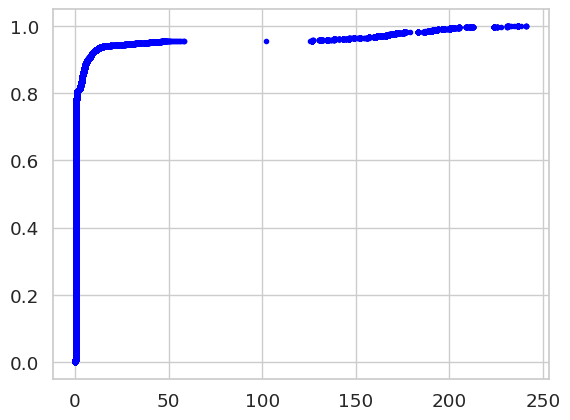

In [50]:
# Compare HM Hybrid zipf vs uniform random writes.
from matplotlib.ticker import LogLocator, LogFormatter
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90-10-LBA/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
data = df['duration']
data_sorted = np.sort(data)
# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)


# Step 3: Calculate 90th and 99th percentiles
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)
# Mark the 90th and 99th percentiles with vertical lines
#plt.axvline(x=p50, color='r', linestyle='--', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
#plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
#plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
#plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")

plt.plot(data_sorted, cdf, marker='.', linestyle='none', label="zipf (90/10) LBA", color='blue')


df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/uniform/1MB/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
threshold = 600
data = df['duration']
filtered_data = data[data <= threshold]

data_sorted = np.sort(filtered_data)

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)
# Mark the 90th and 99th percentiles with vertical lines
#plt.axvline(x=p50, color='r', linestyle=':', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
#plt.axvline(x=p90, color='black', linestyle=':', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
#plt.axvline(x=p99, color='g', linestyle=':', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
#plt.axvline(x=p999, color='y', linestyle=':', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")


# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale('log', base=2)
plt.plot(data_sorted, cdf, marker='.', linestyle='none', color='red', label='uniform random')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HM-Hybrid \n (uniform vs 90/10 zipf random writes pattern), 45GB burst, \n Different Effective Cache Sizes', fontsize=14)
plt.grid(True)
plt.savefig("/home/surbhi/Downloads/1M_STL_CDF_ZoneUtilization.pdf", bbox_inches='tight', format="pdf")
plt.show()

Total duration: 15.896136944444445 hours


Text(0, 0.5, 'CDF')

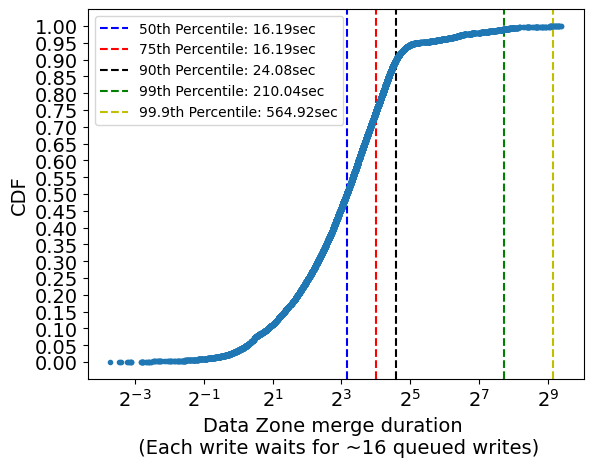

In [370]:
col_names=['dzonenr', 'duration', 'extents']

# Step 1: Read the CSV file into a Pandas DataFrame
#df = pd.read_csv('/home/surbhi/measurements/HM-Hybrid/cache/bg-cleaning/4K/so-far-cache0-8.35am.log', sep=' ', names=col_names)
#df = pd.read_csv('/home/surbhi/measurements/HM-Hybrid/cache/bg-cleaning/4K/data-zones-list', sep=' ', names=col_names)
#df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/4KB/90-10-LBA/90Util/15Zones.WakeOne/data-zone-list', sep=' ', names=col_names)
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/uniform/1MB/90Util/data-zones-list', sep=' ', names=col_names)
df['duration'] = df['duration']/1e3
df['cumulative_duration'] = df['duration'].cumsum()
total = df['duration'].sum() / (60 ** 2)
print(f"Total duration: {total} hours")

# Create a group label for every 32 rows
df['group'] = (df.index // 9)
# Apply cumsum to each group
df['cumulative_duration'] = df.groupby('group')['duration'].cumsum()

data_sorted = np.sort(df['cumulative_duration'])
# Step 2: Compute the Cumulative Distribution Function (CDF)
#cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data_sorted, 50)
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)
# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p50, color='blue', linestyle='--', label='50th Percentile: ' + str(round(p75, 2)) + "sec" )
plt.axvline(x=p75, color='r', linestyle='--', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")
plt.xscale('log', base=2)

plt.legend()
plt.yticks(np.arange(0, 1.1, 0.05))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Data Zone merge duration \n (Each write waits for ~16 queued writes)', fontsize=14)
plt.ylabel('CDF', fontsize=14)